<a href="https://colab.research.google.com/github/ahmtox/stereo-matching/blob/main/lab_deliverable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys

IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  print('Running on Colab... Preparing to mount Google Drive')
  from google.colab import drive
  drive.mount('/content/drive')

  !apt-get install git
  !pip install pupil-apriltags
  !git clone https://github.com/ahmtox/stereo-matching.git

  sys.path.append('/content/stereo-matching')

  print('Google Drive mounted at /content/drive')
else:
  print('Not running on Google Colab.')


Running on Colab... Preparing to mount Google Drive
Mounted at /content/drive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 19.4 MB/s eta 0:00:00
Cloning into 'stereo-matching'...
remote: Enumerating objects: 41910, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 41910 (delta 17), reused 33 (delta 7), pack-reused 41867
Receiving objects: 100% (41910/41910), 178.12 MiB | 20.64 MiB/s, done.
Resolving deltas: 100% (23287/23287), done.
Updating files: 100% (39735/39735), done.
Google Drive mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from camera_calibration import CameraCalibration
from stereogram_generator import StereogramGenerator
from stereo_calibration import stereo_calibrate

In [3]:
if IN_COLAB:
  imgL_path = 'drive/MyDrive/ES143Final/camera_left_final/IMG_3625.jpeg'
  imgR_path = 'drive/MyDrive/ES143Final/camera_right_final/IMG_4206.jpeg'
  calib_left_camera_filepath = 'drive/MyDrive/ES143Final/camera_left_final/calibration/calibration_*.jpeg'
  calib_right_camera_filepath = 'drive/MyDrive/ES143Final/camera_right_final/calibration/calibration_*.jpeg'

else:
  imgL_path = 'camera_left/IMG_4014.jpeg'
  imgR_path = 'camera_right/IMG_7002.jpeg'
  calib_left_camera_filepath = 'camera_left/calibration/IMG_*.jpeg'
  calib_right_camera_filepath = 'camera_right/calibration/IMG_*.jpeg'

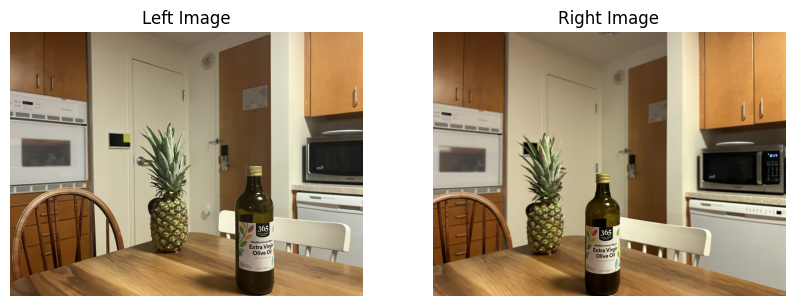

In [4]:
imgL = cv2.imread(imgL_path)
imgR = cv2.imread(imgR_path)

imgL = cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB)
imgR = cv2.cvtColor(imgR, cv2.COLOR_BGR2RGB)


fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(imgL)
ax[0].set_title('Left Image')
ax[0].axis('off')


ax[1].imshow(imgR)
ax[1].set_title('Right Image')
ax[1].axis('off')

plt.show()

Camera Calibration

27 images:
RMSE of reprojected points: 0.6439761170943135
Distortion coefficients: [[ 0.06614 -0.27729 -0.00199  0.00039  0.41336]]
Intrinsic camera matrix:
 [[3097.94    0.   1991.97]
 [   0.   3101.79 1504.62]
 [   0.      0.      1.  ]]
Total images used for calibration:  27
Extrinsic matrix for image 1:
[[ 0.03  1.   -0.04 -0.71]
 [ 1.   -0.03  0.05 -4.51]
 [ 0.05 -0.05 -1.   18.31]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 2:
[[ 0.    1.   -0.08 -0.42]
 [ 0.94 -0.03 -0.35 -4.38]
 [-0.35 -0.07 -0.93 20.61]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 3:
[[ 0.06  1.   -0.04 -0.32]
 [ 0.84 -0.03  0.54 -3.68]
 [ 0.54 -0.07 -0.84 17.03]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 4:
[[-0.16  0.84 -0.51  1.13]
 [ 0.99  0.11 -0.13 -5.48]
 [-0.05 -0.52 -0.85 22.52]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 5:
[[ 0.14  0.99  0.06 -2.12]
 [ 0.93 -0.11 -0.35 -3.76]
 [-0.34  0.1  -0.94 21.51]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image

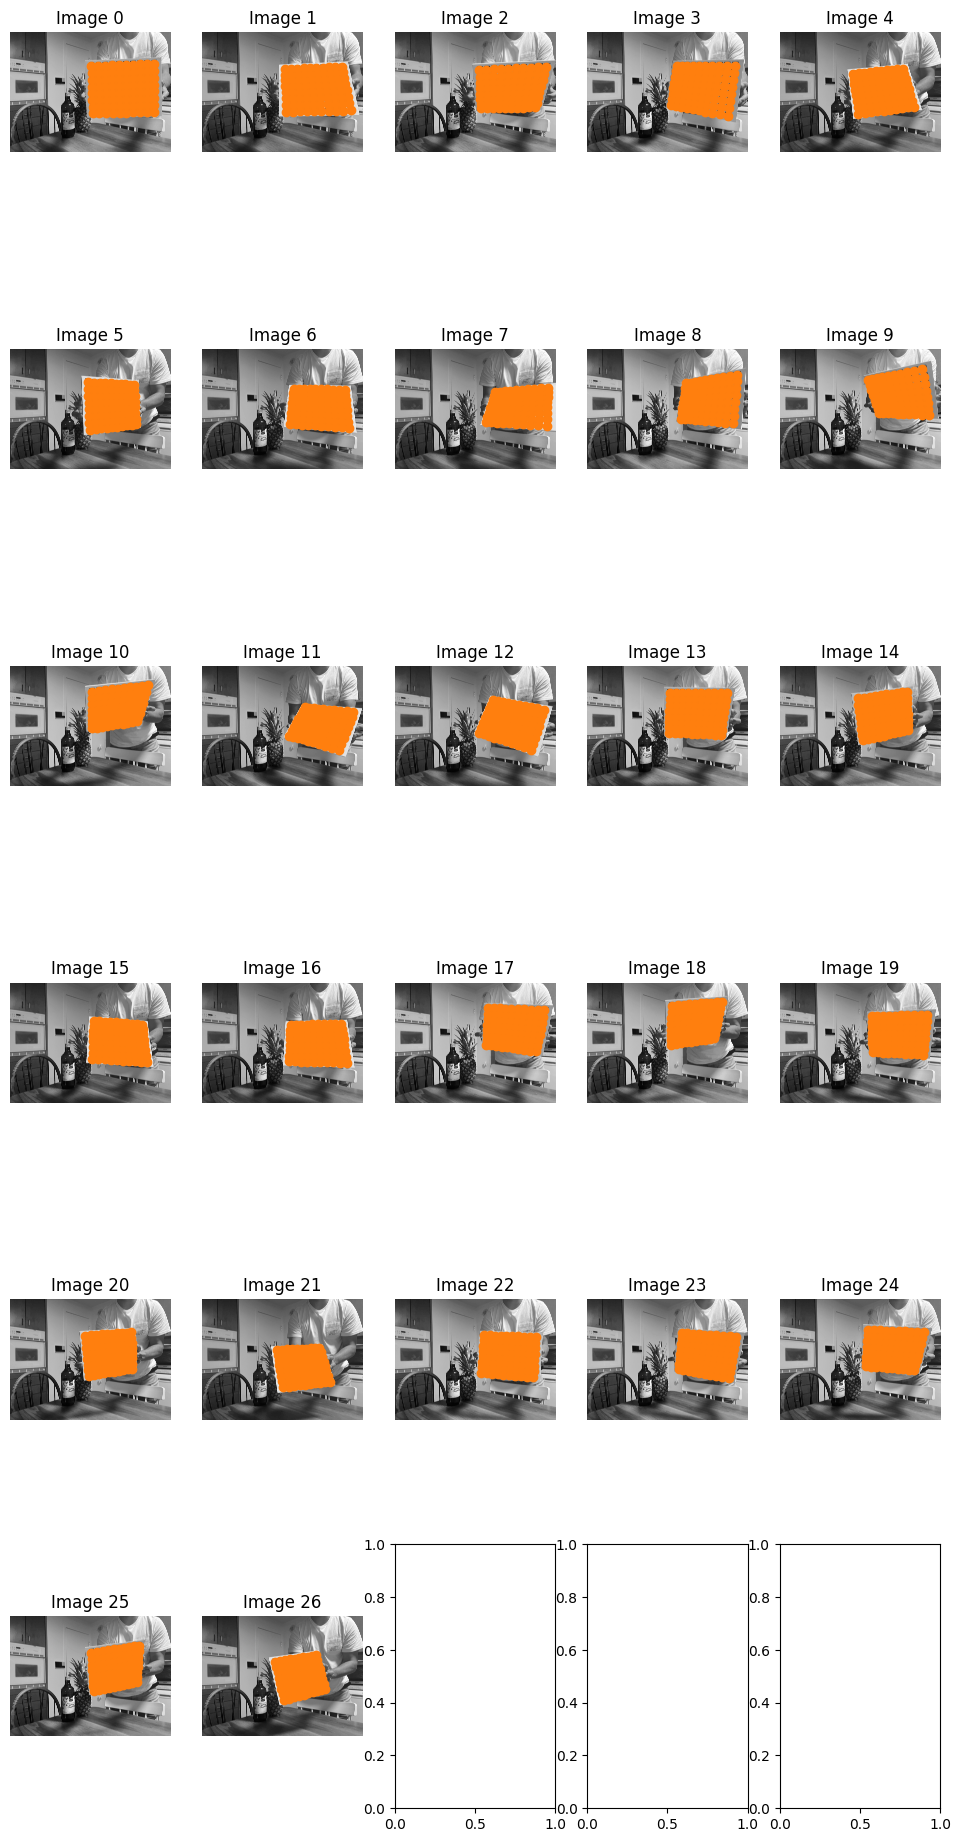

In [5]:
left_cc = CameraCalibration()
reprojerr_L, calMatrix_L, distCoeffs_L, calRotations_L, calTranslations_L, extrinsic_matrices_L, calObjPoints_L, calImgPoints_L = left_cc.calibrate_camera(calib_left_camera_filepath, True)

27 images:
RMSE of reprojected points: 0.35510101349302564
Distortion coefficients: [[ 0.14588  0.14601  0.00246  0.00174 -2.16759]]
Intrinsic camera matrix:
 [[2841.83    0.   2031.05]
 [   0.   2843.48 1535.45]
 [   0.      0.      1.  ]]
Total images used for calibration:  27
Extrinsic matrix for image 1:
[[ 0.02  1.   -0.04 -7.56]
 [ 1.   -0.02  0.03 -4.2 ]
 [ 0.03 -0.04 -1.   18.22]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 2:
[[-0.01  1.   -0.07 -7.3 ]
 [ 0.93 -0.02 -0.37 -4.03]
 [-0.37 -0.07 -0.93 20.54]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 3:
[[ 0.05  1.   -0.05 -7.18]
 [ 0.85 -0.02  0.52 -3.4 ]
 [ 0.52 -0.07 -0.85 16.95]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 4:
[[-0.17  0.85 -0.51 -5.73]
 [ 0.98  0.11 -0.15 -5.07]
 [-0.07 -0.52 -0.85 22.48]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 5:
[[ 0.13  0.99  0.07 -9.  ]
 [ 0.93 -0.09 -0.36 -3.42]
 [-0.35  0.11 -0.93 21.41]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for imag

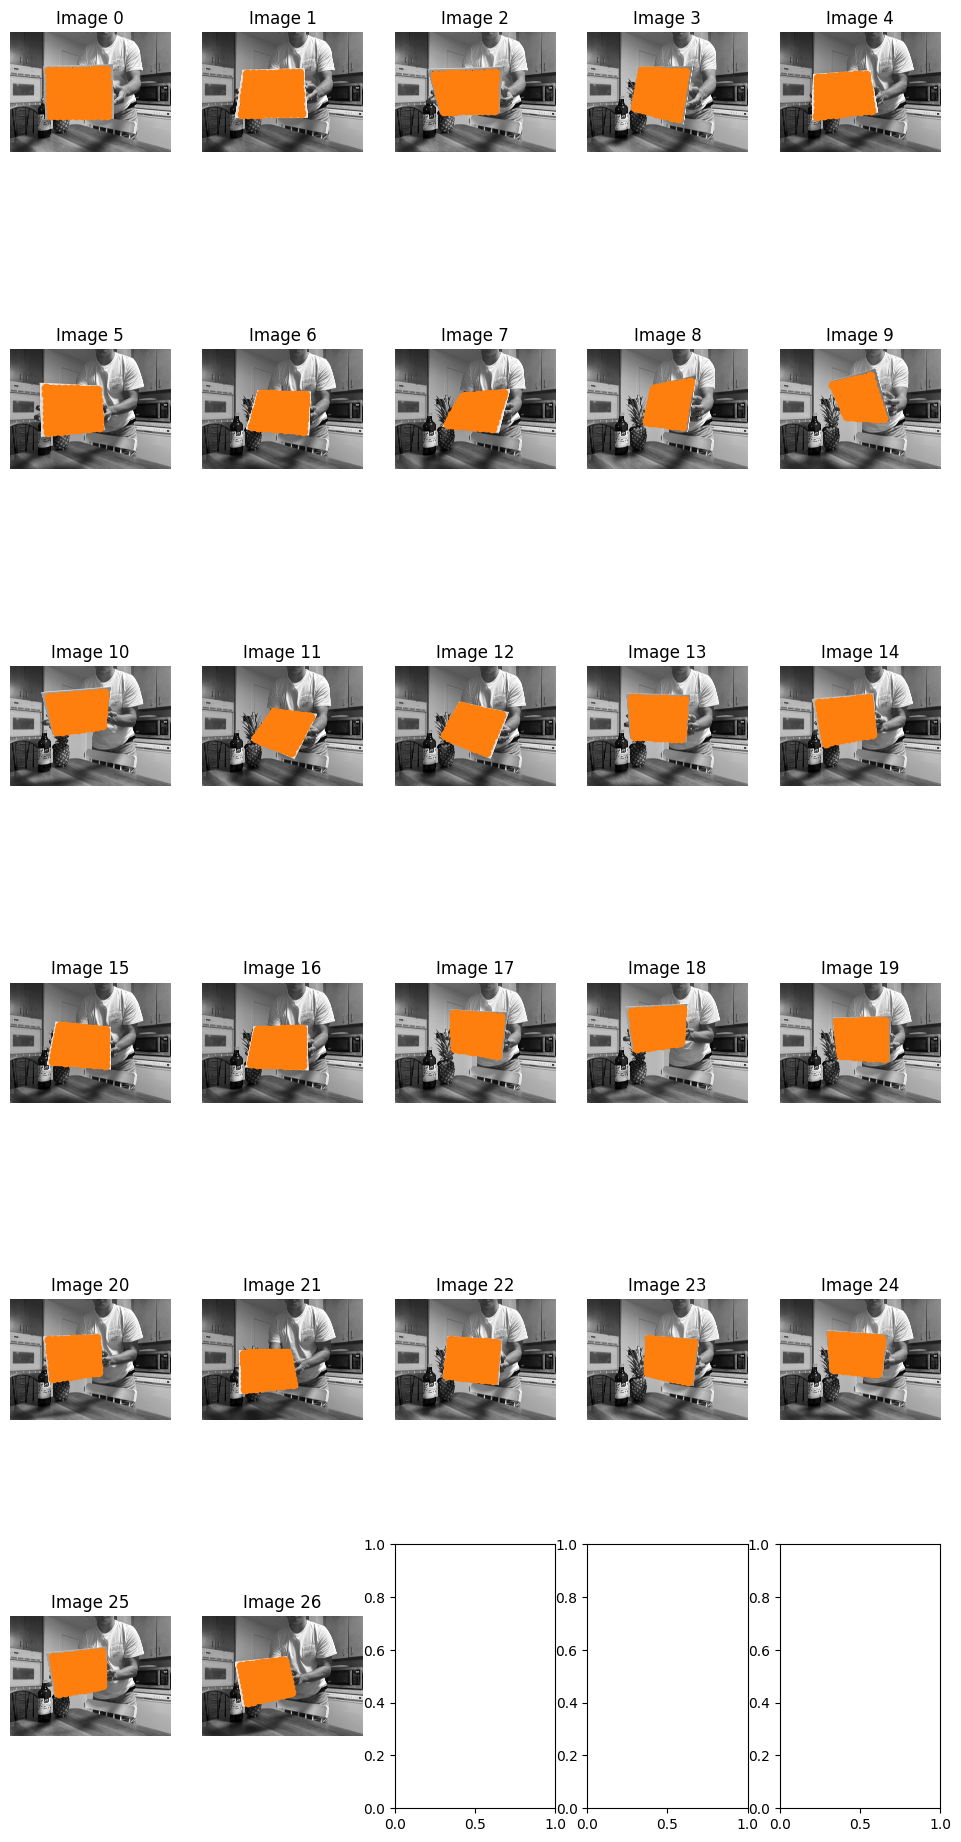

In [6]:
right_cc = CameraCalibration()
reprojerr_R, calMatrix_R, distCoeffs_R, calRotations_R, calTranslations_R, extrinsic_matrices_R, calObjPoints_R, calImgPoints_R = right_cc.calibrate_camera(calib_right_camera_filepath, True)

In [7]:
print("Number of object point sets:", len(calObjPoints_L))
print("Number of image point sets in left images:", len(calImgPoints_L))
print("Number of image point sets in right images:", len(calImgPoints_R))

print("Object points per set:", [len(pts) for pts in calObjPoints_L])
print("Image points in left per set:", [len(pts) for pts in calImgPoints_L])
print("Image points in right per set:", [len(pts) for pts in calImgPoints_R])


Number of object point sets: 27
Number of image point sets in left images: 27
Number of image point sets in right images: 27
Object points per set: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Image points in left per set: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Image points in right per set: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]


In [8]:
img_shape = (imgR.shape[0], imgR.shape[1])

flags = cv2.CALIB_RATIONAL_MODEL
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 1000, 1e-5)
retval, cameraMatrix1, distCoeffs1, cameraMatrix2, distCoeffs2, R, T, E, F = cv2.stereoCalibrate(
        calObjPoints_L, calImgPoints_L, calImgPoints_R, calMatrix_L, distCoeffs_L, calMatrix_R, distCoeffs_R, img_shape,
        criteria=criteria, flags=flags)

In [9]:
print('R:', R)
print('T:', T)
print('E:', E)
print('F: ', F)


R: [[ 1.   -0.01 -0.  ]
 [ 0.01  1.    0.02]
 [ 0.   -0.02  1.  ]]
T: [[-6.93]
 [-0.08]
 [ 0.02]]
E: [[-0.   -0.02 -0.09]
 [ 0.03 -0.14  6.93]
 [ 0.   -6.93 -0.14]]
F:  [[ 0.    0.    0.  ]
 [-0.    0.   -0.01]
 [ 0.    0.    1.  ]]


In [10]:
R1, R2, P1, P2, Q, roi_left, roi_right = cv2.stereoRectify(cameraMatrix1, distCoeffs1, cameraMatrix2, distCoeffs2, imgR.shape[:2], R, T)

Rectify1 = R1
Rectify2 = R2


map1x, map1y = cv2.initUndistortRectifyMap(cameraMatrix1, distCoeffs1, Rectify1, P1, imgL.shape[:2], cv2.CV_32FC1)
map2x, map2y = cv2.initUndistortRectifyMap(cameraMatrix2, distCoeffs2, Rectify2, P2, imgR.shape[:2], cv2.CV_32FC1)

rectified_imgL = cv2.remap(imgL, map1x, map1y, cv2.INTER_LINEAR)
rectified_imgR = cv2.remap(imgR, map2x, map2y, cv2.INTER_LINEAR)


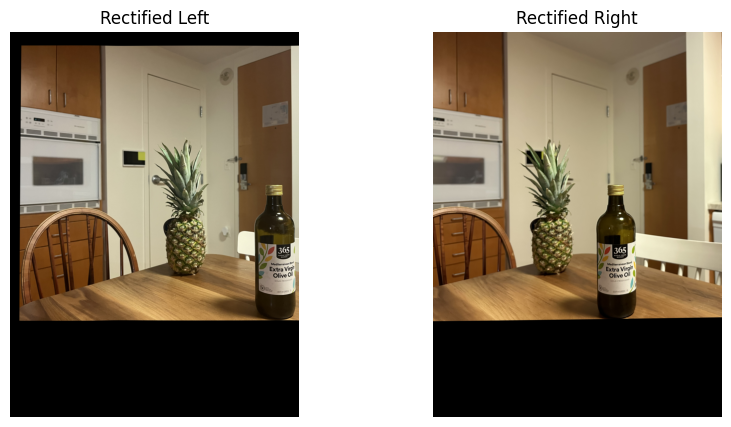

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(rectified_imgL)
ax[0].set_title('Rectified Left')
ax[0].axis('off')

ax[1].imshow(rectified_imgR)
ax[1].set_title('Rectified Right')
ax[1].axis('off')

plt.show()

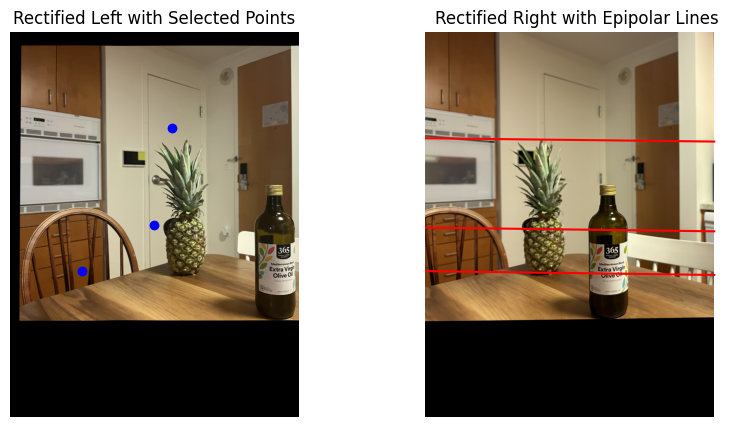

In [26]:
def plot_epipolar_lines(image, epilines, ax, color='r'):
    height, width = image.shape[:2]


    for r in epilines:
        x0, y0 = 0, int(-r[2] / r[1])
        x1, y1 = width, int(-(r[2] + r[0] * width) / r[1])

        ax.plot([x0, x1], [y0, y1], color)


points_left = np.array([
    [1512, 2016],
    [756, 2500],
    [1700, 1008],
], dtype=np.float32)

points_left_hom = np.hstack([points_left, np.ones((points_left.shape[0], 1))])

epilines_right = cv2.computeCorrespondEpilines(points_left_hom, 1, F).reshape(-1, 3)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(rectified_imgL)
ax[0].scatter(points_left[:, 0], points_left[:, 1], c='b', marker='o')
ax[0].set_title('Rectified Left with Selected Points')
ax[0].axis('off')

ax[1].imshow(rectified_imgR)
plot_epipolar_lines(rectified_imgR, epilines_right, ax[1])
ax[1].set_title('Rectified Right with Epipolar Lines')
ax[1].axis('off')



plt.show()

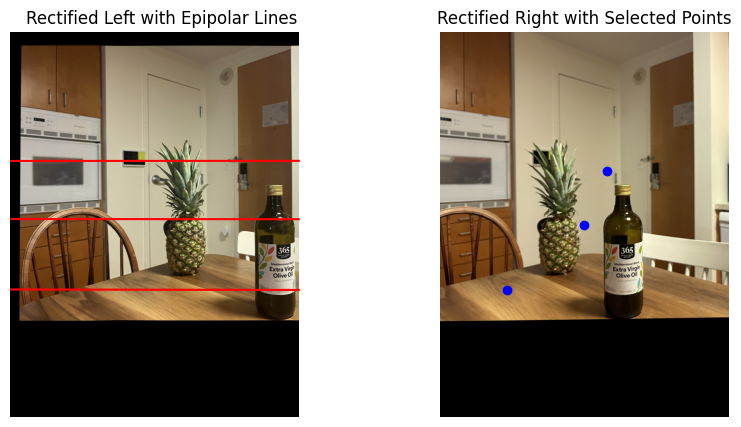

In [27]:
points_right = np.array([
    [1512, 2016],
    [700, 2700],
    [1750, 1450],
], dtype=np.float32)

points_right_hom = np.hstack([points_right, np.ones((points_right.shape[0], 1))])

epilines_left = cv2.computeCorrespondEpilines(points_right_hom, 2, F).reshape(-1, 3)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(rectified_imgL)
plot_epipolar_lines(rectified_imgL, epilines_left, ax[0])
ax[0].set_title('Rectified Left with Epipolar Lines')
ax[0].axis('off')

ax[1].imshow(rectified_imgR)
ax[1].scatter(points_right[:, 0], points_right[:, 1], c='b', marker='o')
ax[1].set_title('Rectified Right with Selected Points')
ax[1].axis('off')

plt.show()